In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv('/kaggle/input/bigmart-sales-data/Train.csv')

In [4]:
df_train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [5]:
print("Number of Rows:",df_train.shape[0])
print("Number of Features:",df_train.shape[1])

Number of Rows: 8523
Number of Features: 12


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Handling Missing Values**

**Mean Method to handle Missing Values in Item_Weight**

In [8]:
#Calculate Mean of Item_Weight column
df_train['Item_Weight'].mean()

12.857645184135976

In [9]:
#Fill missing values in Item_Weight column with mean
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)

/tmp/ipykernel_33/2422647974.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)


In [10]:
#Check for missing values
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Mode Method to handle Missing Values in Outlet_Size**

In [11]:
df_train['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [12]:
#Calculate mode of Outlet_Size column for each Outlet_Type in Outlet_Size
df_train.groupby('Outlet_Type')['Outlet_Size'].agg(pd.Series.mode)

Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object

In [13]:
#Fill missing values in Outlet_Size column with mode of Outlet_Size column for each Outlet_Type in Outlet_Size
df_train.loc[df_train['Outlet_Type']=='Grocery Store','Outlet_Size']='Small'
df_train.loc[df_train['Outlet_Type']=='Supermarket Type1','Outlet_Size']='Small'
df_train.loc[df_train['Outlet_Type']=='Supermarket Type2','Outlet_Size']='Medium'
df_train.loc[df_train['Outlet_Type']=='Supermarket Type3','Outlet_Size']='Medium'

In [14]:
#Check for missing values
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [15]:
#See descriptive statistics of numerical columns
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**Data Visualization of Numerical Features**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


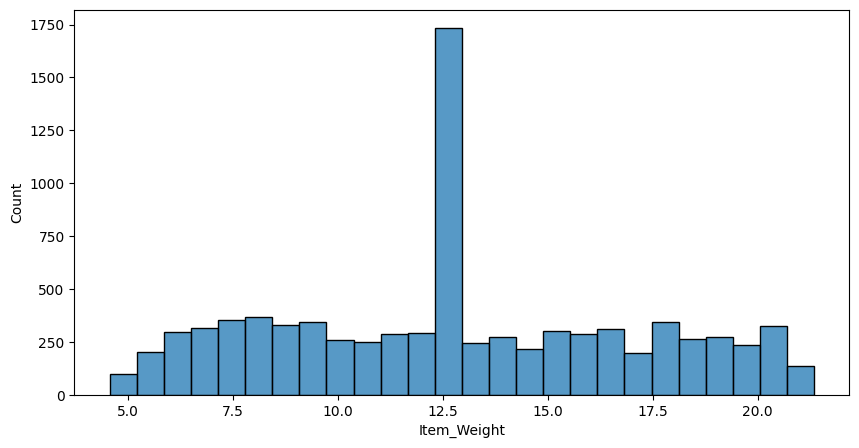

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


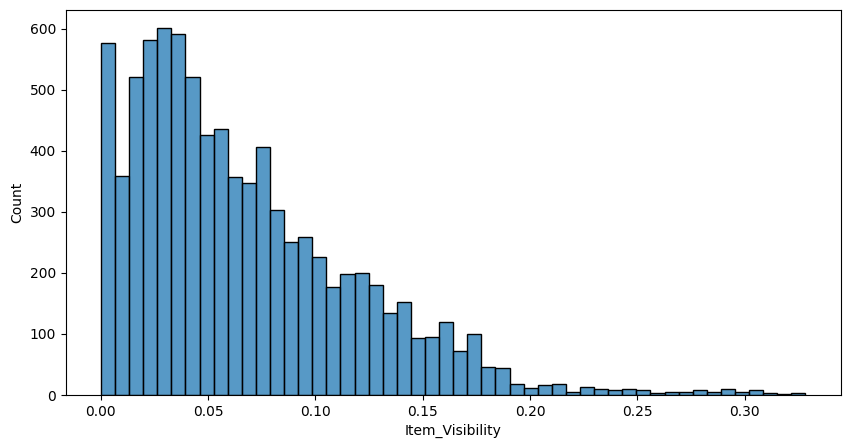

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


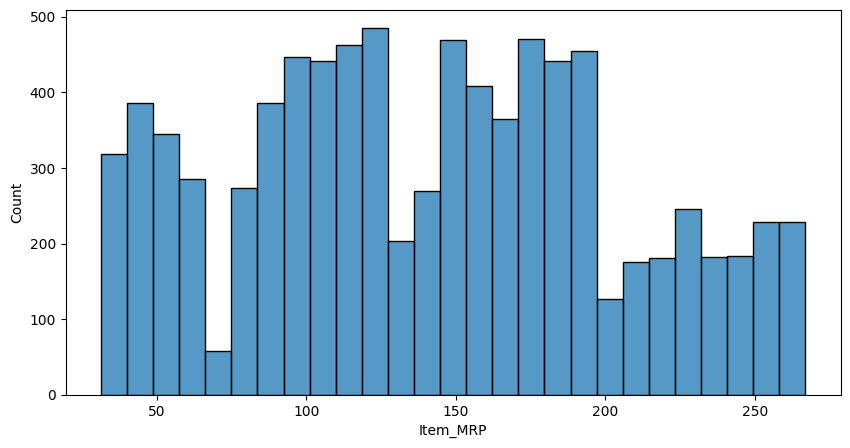

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


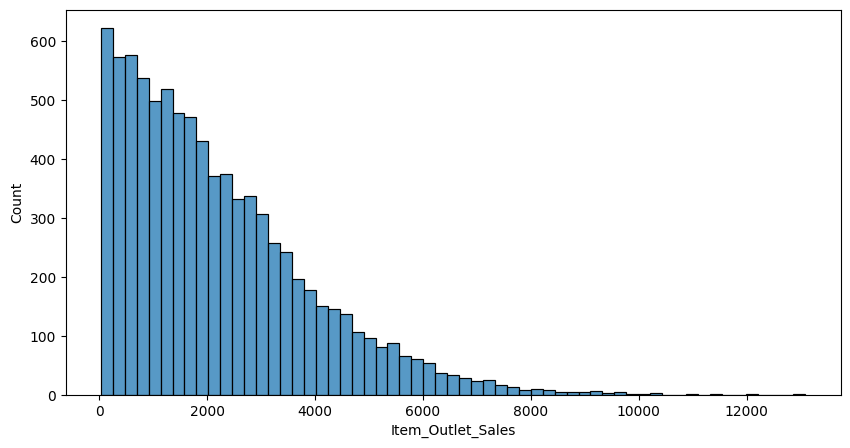

In [16]:
#Plot distplot for numerical columns
cols = ['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']
for col in cols:
    plt.figure(figsize=(10,5))
    sns.histplot(df_train[col])
    plt.show()

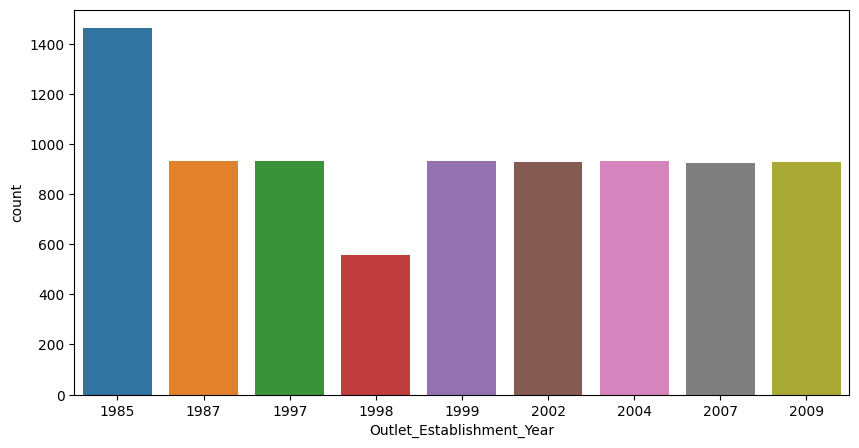

In [17]:
#Plot countplot for Outlet_Establishment_Year column
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Establishment_Year', data=df_train)
plt.show()

**Data Visualization of Categorical Features**

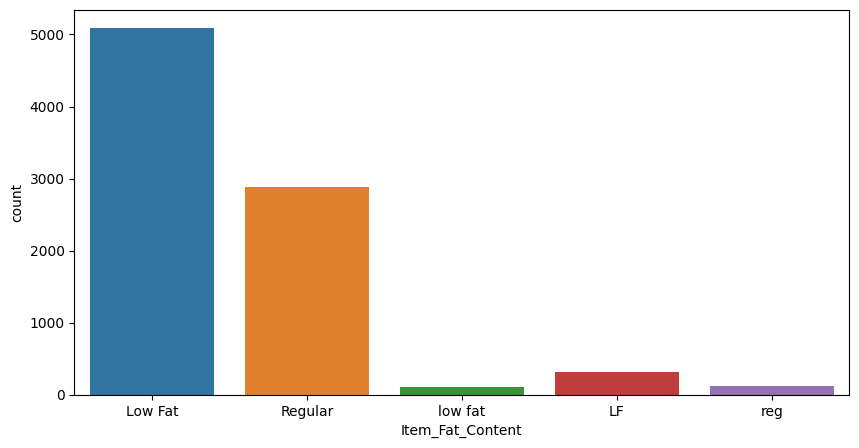

In [18]:
#Plot countplot for Item_Fat_Content column
plt.figure(figsize=(10,5))
sns.countplot(x= "Item_Fat_Content" , data=df_train)
plt.show()

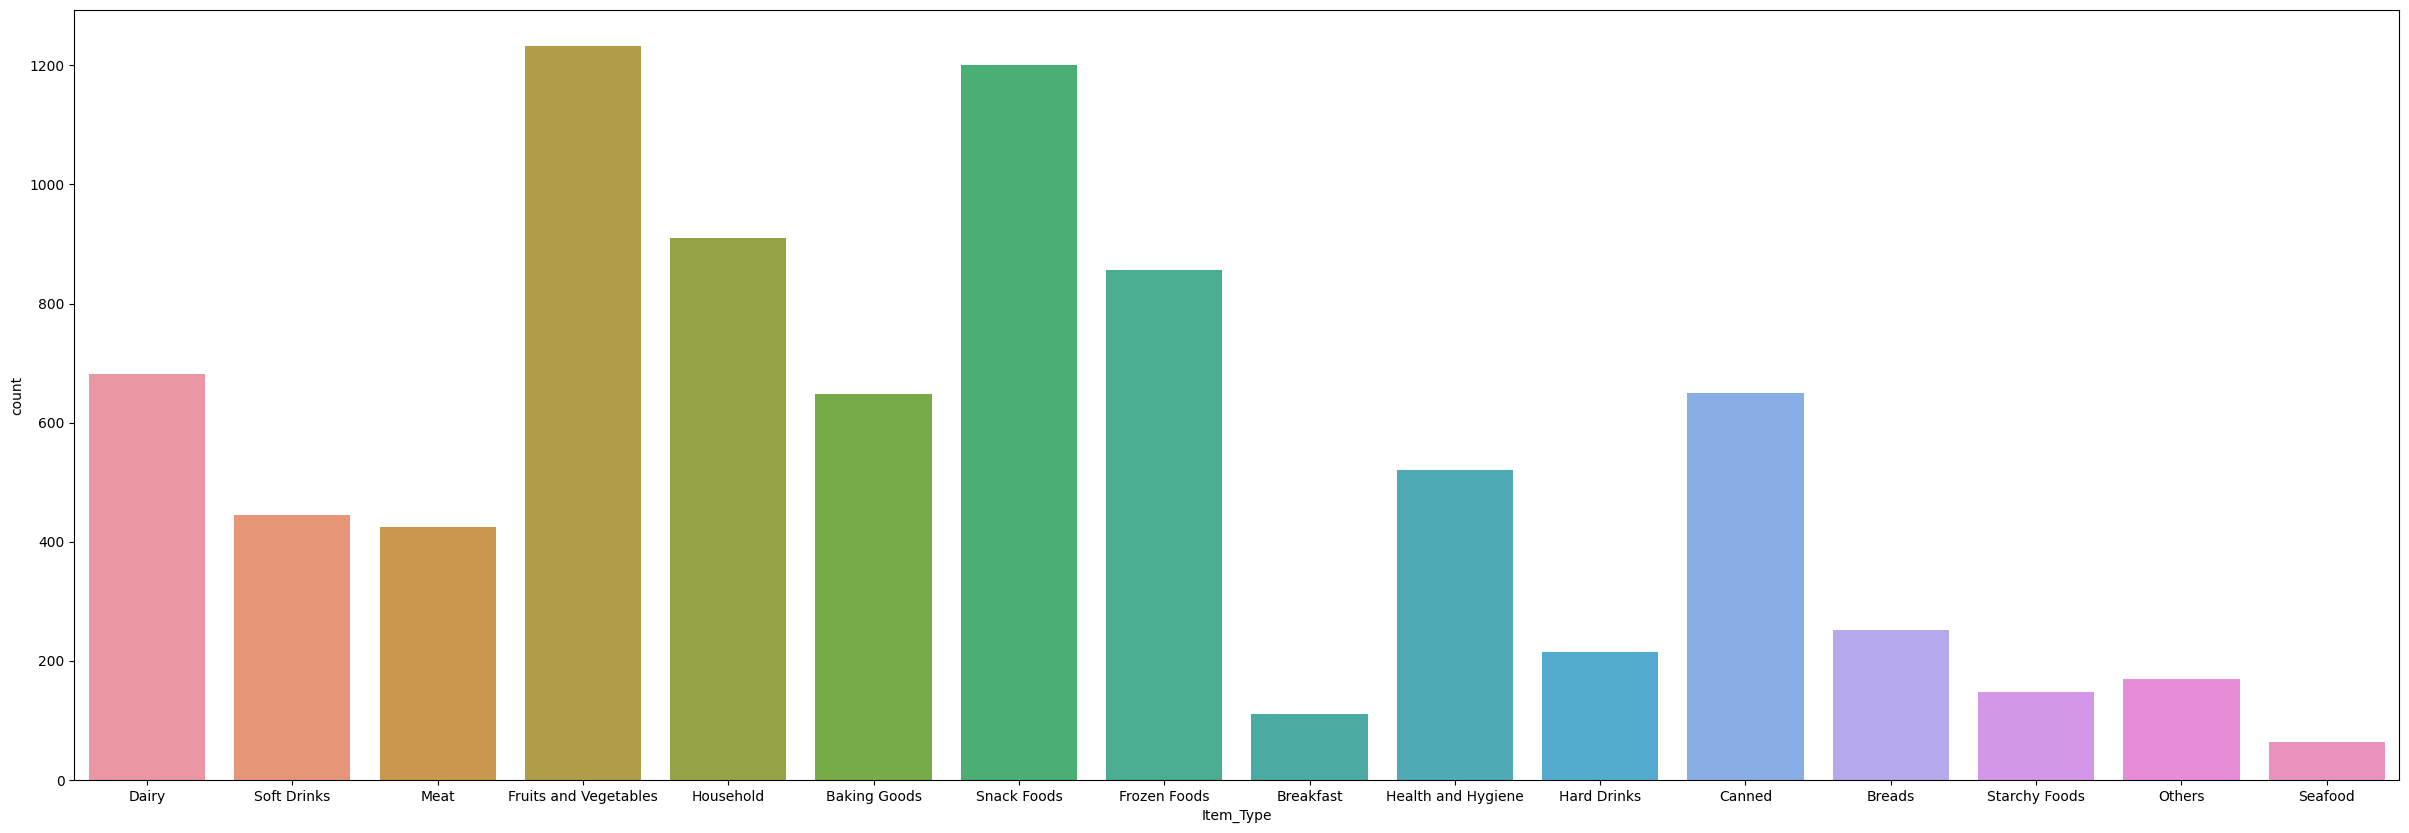

In [19]:
#Plot countplot for Item_Type column
plt.figure(figsize=(30,10))
sns.countplot(x= "Item_Type" , data=df_train)
plt.show()

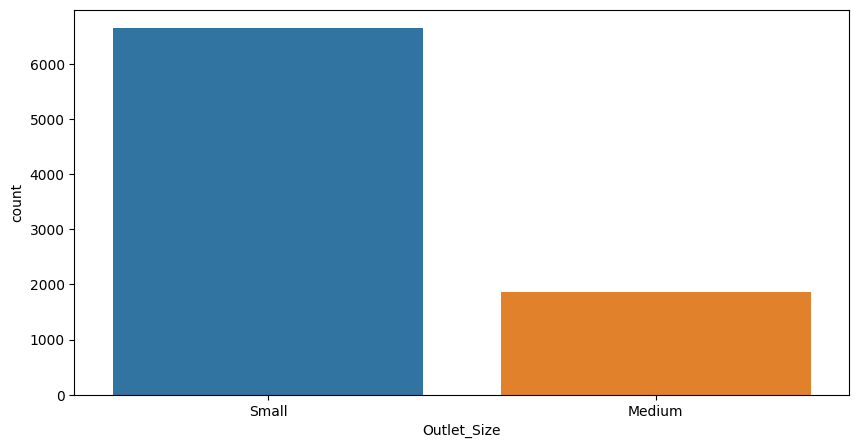

In [20]:
#Plot countplot for Outlet_Size column
plt.figure(figsize=(10,5))
sns.countplot(x= "Outlet_Size" , data=df_train)
plt.show()

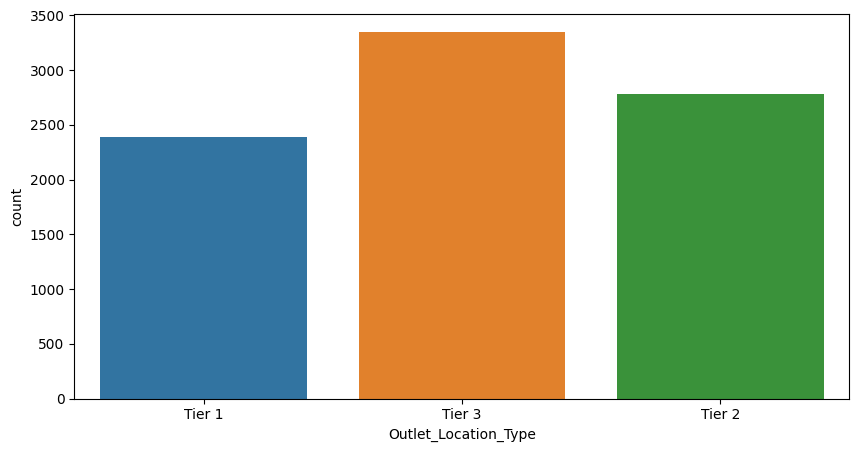

In [21]:
#Plot countplot for Outlet_Location_Type column
plt.figure(figsize=(10,5))
sns.countplot(x= "Outlet_Location_Type" , data=df_train)
plt.show()

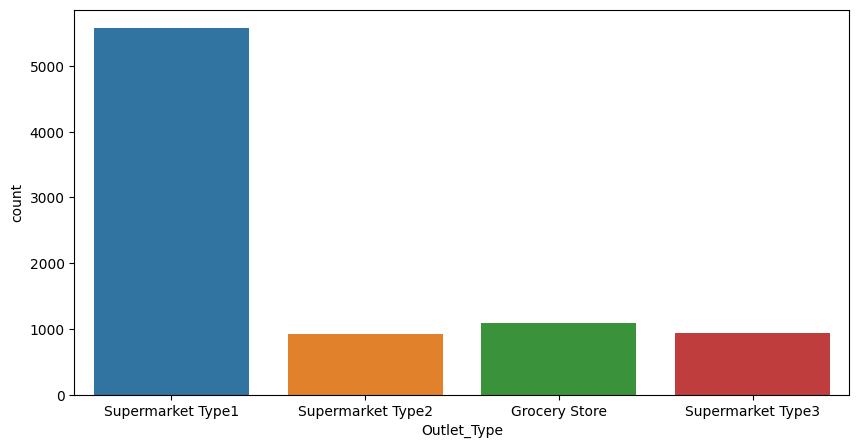

In [22]:
#Plot countplot for Outlet_Type column
plt.figure(figsize=(10,5))
sns.countplot(x= "Outlet_Type" , data=df_train)
plt.show()

**Data Preprocessing**

In [23]:
#see categories in Item_Fat_Content column
df_train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [24]:
#handle Item_Fat_Content column categories with replacement
df_train['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'},inplace=True)

/tmp/ipykernel_33/286725968.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'},inplace=True)


In [25]:
#see categories in Item_Fat_Content column
df_train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

**Handle Categorical Features**

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
#Apply Label Encoding on categorical columns
le = LabelEncoder()

df_train['Item_Fat_Content'] = le.fit_transform(df_train['Item_Fat_Content'])

df_train['Item_Type'] = le.fit_transform(df_train['Item_Type'])

df_train['Outlet_Size'] = le.fit_transform(df_train['Outlet_Size'])

df_train['Outlet_Location_Type'] = le.fit_transform(df_train['Outlet_Location_Type'])

df_train['Outlet_Type'] = le.fit_transform(df_train['Outlet_Type'])

df_train['Item_Identifier'] = le.fit_transform(df_train['Item_Identifier'])

df_train['Outlet_Identifier'] = le.fit_transform(df_train['Outlet_Identifier'])

In [30]:
df_train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300000,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920000,1,0.019278,14,48.2692,3,2009,0,2,2,443.4228
2,662,17.500000,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200000,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930000,0,0.000000,9,53.8614,1,1987,1,2,1,994.7052
5,758,10.395000,1,0.000000,0,51.4008,3,2009,0,2,2,556.6088
6,696,13.650000,1,0.012741,13,57.6588,1,1987,1,2,1,343.5528
7,738,12.857645,0,0.127470,13,107.7622,5,1985,0,2,3,4022.7636
8,440,16.200000,1,0.016687,5,96.9726,7,2002,1,1,1,1076.5986
9,990,19.200000,1,0.094450,5,187.8214,2,2007,1,1,1,4710.5350


In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int64  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 799.2 KB
